In [1]:
import os

n_dSPN = 4
n_iSPN = 4
n_FS = 4
n_LTS = 1
n_ChIN = 0

hold_v = -80e-3    # Holding voltage
max_dist = 100e-6  # Only look at pairs closer than this distance
GABA_rev = -60e-3  # GABA reversal potential

cur_inj = 10e-9

network_path = os.path.join("networks","pair_recording_simulation")
volume_type="cube"
side_len = 200e-6

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337)
cnc.define_striatum(num_dSPN=n_dSPN, num_iSPN=n_iSPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                    volume_type="cube", side_len=side_len)
cnc.write_json()

Using cube for striatum
Adding neurons: FS from dir $SNUDDA_DATA/neurons/striatum/fs
Adding neurons: dSPN from dir $SNUDDA_DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $SNUDDA_DATA/neurons/striatum/ispn
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002],[-0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[-0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009],[-0.0001],[-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[-0.0001],[3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[0.0001],[-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[0.0001],[3.e-05]) = [1.72360142e-23]
Adding neurons: LTS from dir $SNUDDA_DATA/neurons/striatum/lts
Writing networks/pair_recording_simulation/network-config.json


In [3]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [4]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

Instantiates par_id = 0
morph_tag = lts_morp_2019-11-07_centered_no_axon.swc
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 24/80 (13 neurons)
Processing hyper voxel : 4/80 (13 neurons)
Processing hyper voxel : 5/80 (13 neurons)
Processing hyper voxel : 25/80 (13 neurons)
Processing hyper voxel : 21/80 (10 neurons)
Processing hyper voxel : 29/80 (9 neurons)
Processing hyper voxel : 9/80 (9 neurons)
Processing hyper voxel : 20/80 (9 neurons)
Processing hyper voxel : 28/80 (9 neurons)
Processing hyper voxel : 1/80 (8 neurons)
Processing hyper voxel : 8/80 (8 neurons)
Processing hyper voxel : 0/80 (6 neurons)
Processing hyper voxel : 26/80 (2 neurons)
Processing hyper voxel : 45/80 (2 neurons)
Processing hyper voxel : 22/80 (1 neurons)
Processing hyper voxel : 2/80 (1 neurons)
Processing hyper voxel : 33/80 (1 neurons)
Processing hyper voxel : 44/80 (1 neurons)
Processing hyper voxel : 46/80 (1 neurons)
Processing hyper voxel : 48/80 (1 neurons)
Process

In [5]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Read 2113 out of total 2113 synapses
Read 62 out of total 62 synapses


Compile neuron modules

In [6]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../snudda/data/neurons/mechanisms/bk_ch.mod" "../../snudda/data/neurons/mechanisms/bk_fs.mod" "../../snudda/data/neurons/mechanisms/bk_ms.mod" "../../snudda/data/neurons/mechanisms/ca_ch.mod" "../../snudda/data/neurons/mechanisms/cadyn_fs.mod" "../../snudda/data/neurons/mechanisms/cadyn_ms.mod" "../../snudda/data/neurons/mechanisms/cal12_ms.mod" "../../snudda/data/neurons/mechanisms/cal13_ms.mod" "../../snudda/data/neurons/mechanisms/cal_ch.mod" "../../snudda/data/neurons/mechanisms/caldyn_ms.mod" "../../snudda/data/neurons/mechanisms/can_fs.mod" "../../snudda/data/neurons/mechanisms/can_ms.mod" "../../snudda/data/neurons/mechanisms/cap_ch.mod" "../../snudda/data/neurons/mechanisms/caq_fs.mod" "../../snudda/data/neurons/mechanisms/caq_ms.mod" "../../snudda/data/neurons/mechanisms/car_fs.mod" "../../snudda/data/neurons/mechanisms/car_ms.mod" "../../snudda/data/neurons/mechanisms/cat32_ms.mod" "../../snudda/data/neurons/mechanisms

In [7]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = os.path.join("..","..", "snudda", "data", "experiment_config", "experiment-config-6.json")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)
pr.run()

Loading 13 neurons with 204 synapses and 39 gap junctions
Setting tmGabaA reversal potential to -40.0 mV
Running simulation for 1.2 s
1% done. Elapsed: 1.9 s, estimated time left: 184.0 s
56% done. Elapsed: 102.9 s, estimated time left: 80.8 s
99% done. Elapsed: 182.4 s, estimated time left: 1.8 s
Simulation run time: 184.3 s


Plot results

In [8]:
%matplotlib notebook
from snudda.plotting import PlotTraces
pt = PlotTraces(file_name=os.path.join(network_path,"simulation","network-voltage-6.txt"),
                network_file=os.path.join(network_path, "network-synapses.hdf5"))

Loading 13 neurons with 204 synapses and 39 gap junctions


Plotting traces: [3, 7, 9, 10, 11, 12]
Plotted 6 traces (total 6)


<IPython.core.display.Javascript object>


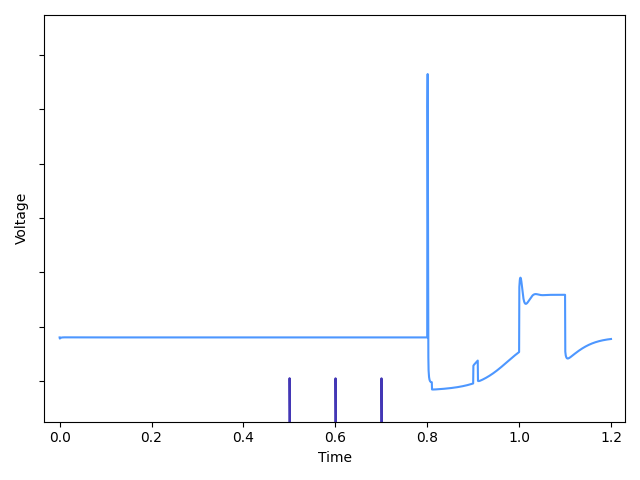

Saving to figure Network-voltage-trace-6-dSPN-iSPN-colour.pdf


<IPython.core.display.Javascript object>


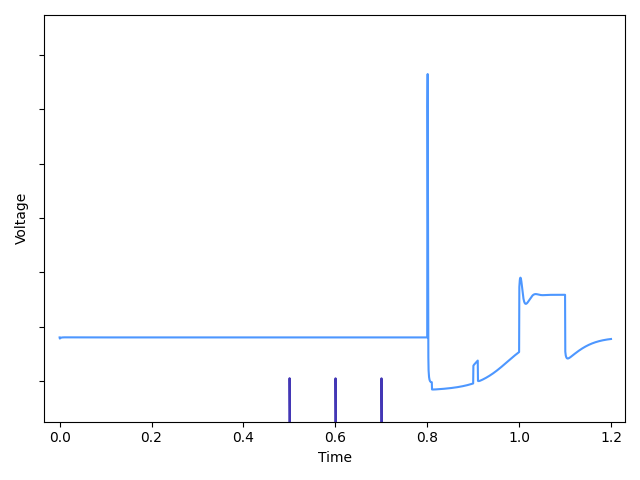

In [9]:
pt.plot_traces([x for x in pt.voltage])

Plotting traces: [1]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


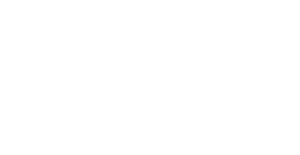

Missing data for trace 1


In [10]:
pt.plot_traces([1], offset=0)

Plotting traces: [5]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


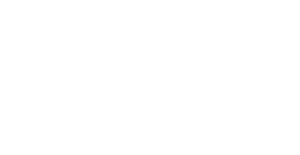

Missing data for trace 5


In [11]:
pt.plot_traces([5], offset=0)

Plotting traces: [9]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


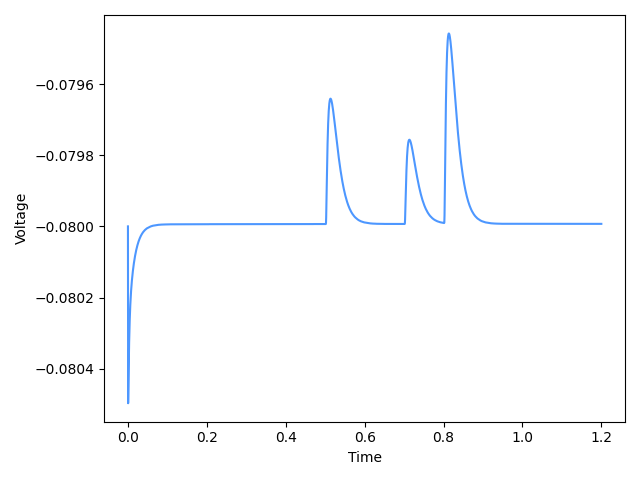

Saving to figure Network-voltage-trace-6-dSPN-colour.pdf


<IPython.core.display.Javascript object>


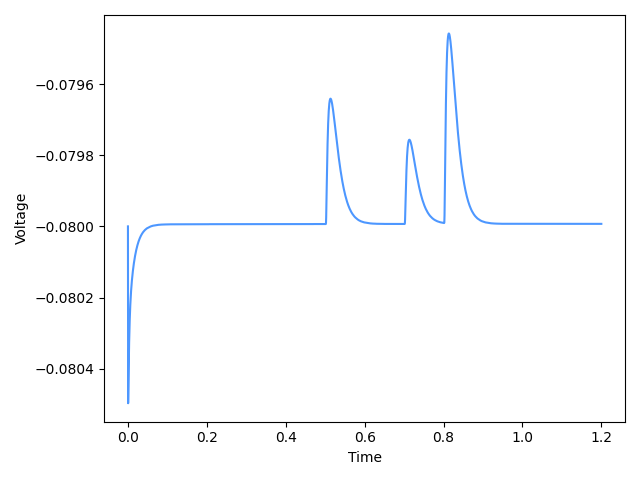

In [12]:
pt.plot_traces([9], offset=0)

Plotting traces: [10]
Plotted 1 traces (total 6)


<IPython.core.display.Javascript object>


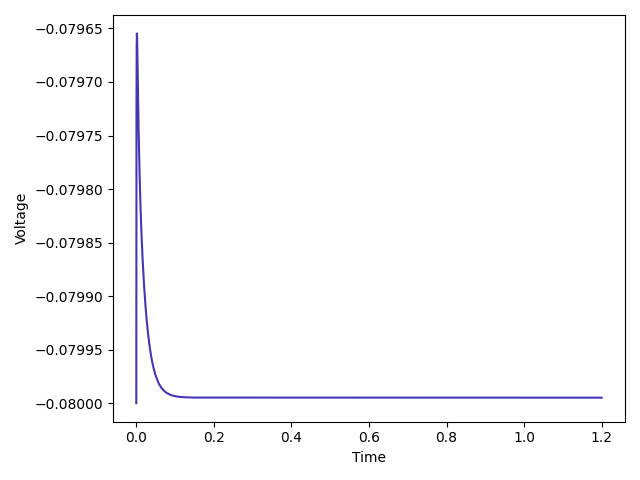

Saving to figure Network-voltage-trace-6-iSPN-colour.pdf


<IPython.core.display.Javascript object>


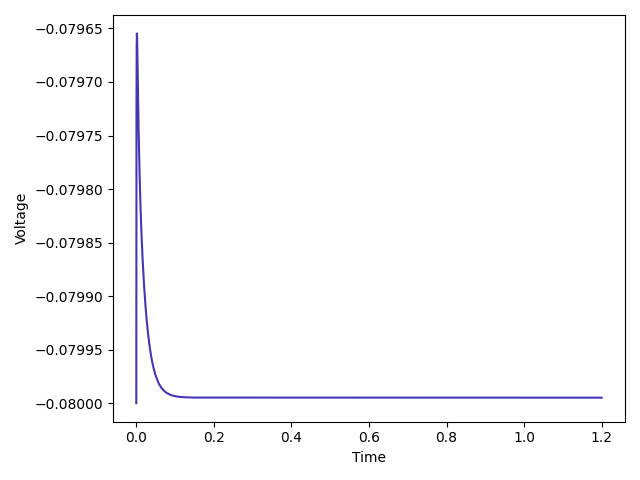

In [13]:
pt.plot_traces([10], offset=0)

Plotting traces: [3, 7, 9, 10, 11, 12]
Plotted 6 traces (total 6)


<IPython.core.display.Javascript object>


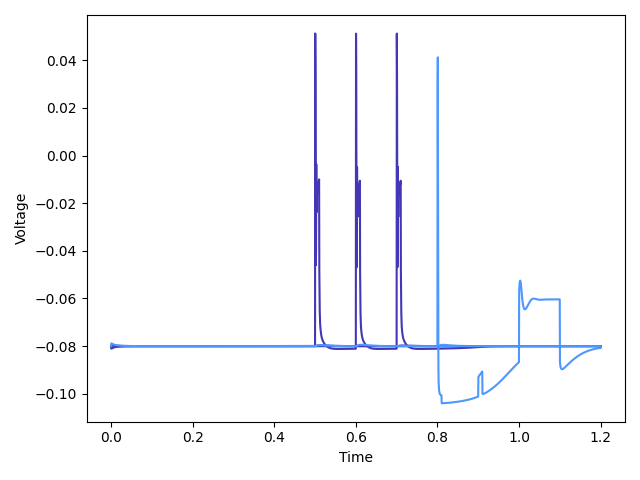

Saving to figure Network-voltage-trace-6-dSPN-iSPN-colour.pdf


<IPython.core.display.Javascript object>


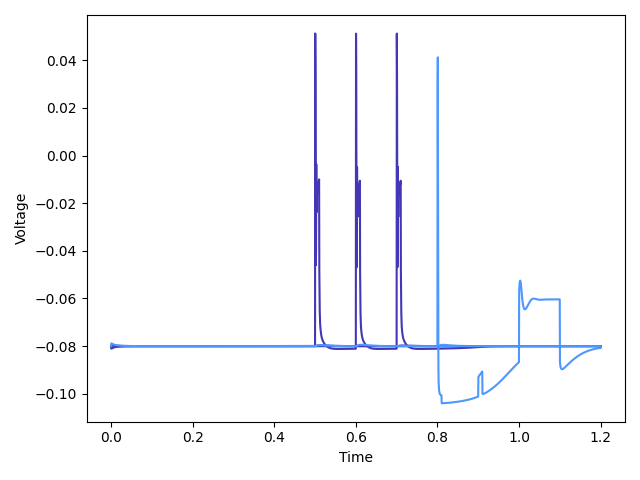

In [16]:
pt.plot_traces([x for x in pt.voltage], offset=0)